## This script contains the following:

* 1 - Import Data & Libraries
* 2 - The elbow technique  
* 3 - k-means clustering


### 1. Importing libraries and data

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = '5'
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
plt.rcParams.update({'font.size': 15})

In [33]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [34]:
# Creating a path for the dataset
path = r'C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achievement6\World Happiness'

In [35]:
# Import the world happiness data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','World_Happiness_2015-2022.csv'))

In [36]:
df.shape

(1230, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1230 non-null   object 
 1   Region           1230 non-null   object 
 2   Year             1230 non-null   int64  
 3   Happiness_Rank   1230 non-null   int64  
 4   Happiness_Score  1230 non-null   float64
 5   GDP_per_Capita   1230 non-null   float64
 6   Social_support   1230 non-null   float64
 7   Life_Expectancy  1230 non-null   float64
 8   Freedom          1230 non-null   float64
 9   Generosity       1230 non-null   float64
 10  Corruption       1229 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 105.8+ KB


In [38]:
# Drop categorical columns and the year and Happiness rank 
df.drop(['Country', 'Region'], axis=1, inplace=True)

In [39]:
df.head()

,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Generosity,Corruption
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [40]:
# Check for null values
df.isnull().sum()

Year               0
Happiness_Rank     0
Happiness_Score    0
GDP_per_Capita     0
Social_support     0
Life_Expectancy    0
Freedom            0
Generosity         0
Corruption         1
dtype: int64

In [41]:
# Droping NaN in the corruption column
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

### 2. The elbow technique

In [42]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [43]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-157493738.68862337,
 -41167295.889482416,
 -19628020.38136936,
 -12124196.64815034,
 -8537145.520877762,
 -6628909.072242644,
 -5576169.812665419,
 -4849603.970760185,
 -4301806.521293479]

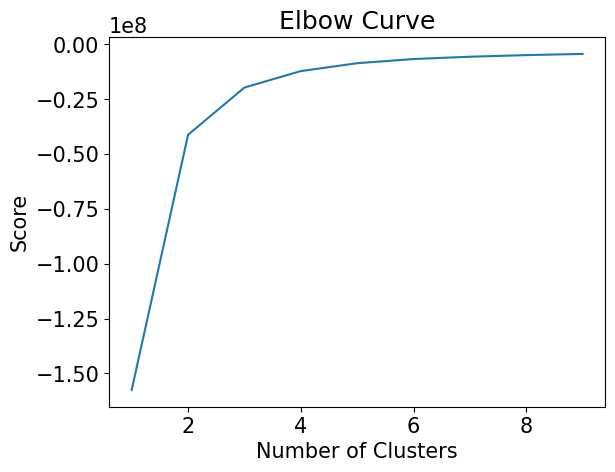

In [44]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a jump from two to three on the x-axis; however, the line does not change further after three. Therefore, the optimal count for the clusters is three.

### 3. k-means clustering

In [45]:
# Create the k-means object with the number of clusters equal to 3
kmeans = KMeans(n_clusters = 3) 

In [46]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [47]:
df['clusters'] = kmeans.fit_predict(df)

In [48]:
df.head()

,index,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Generosity,Corruption,clusters
0,0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1
1,1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1
2,2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1
3,3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1
4,4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1


In [49]:
df['clusters'].value_counts()

0    411
1    409
2    409
Name: clusters, dtype: int64

### Plot clusters for the "GDP per Capita" and "Happiness Score" variables.

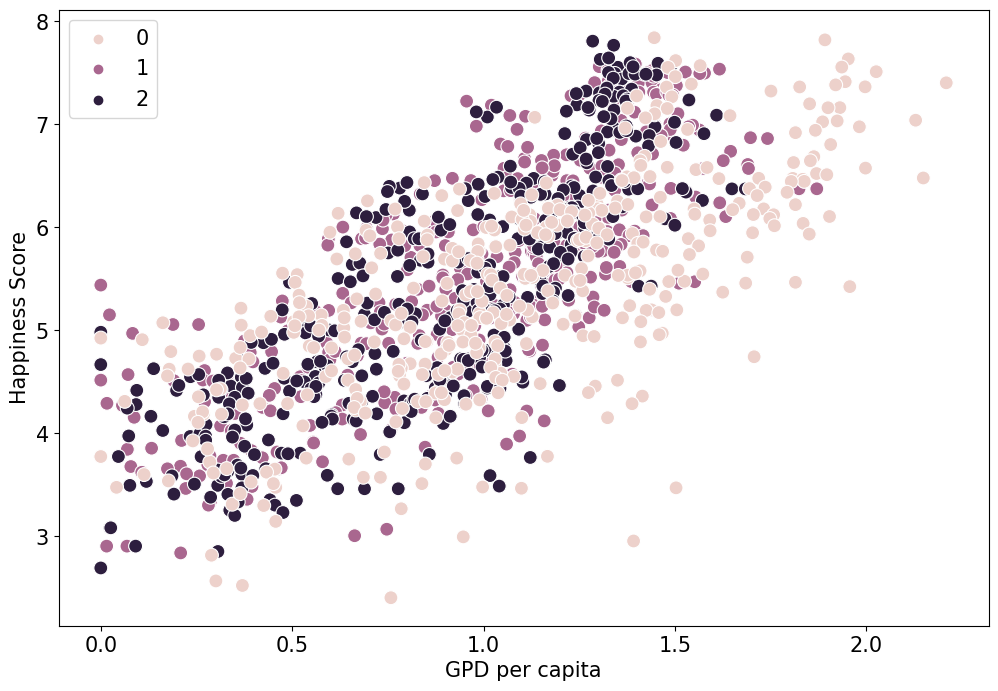

In [50]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP_per_Capita'], y=df['Happiness_Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('GPD per capita') 
plt.ylabel('Happiness Score') 
plt.show()

### Plot clusters for the "Life Expectancy" and "Happiness Score" variables.

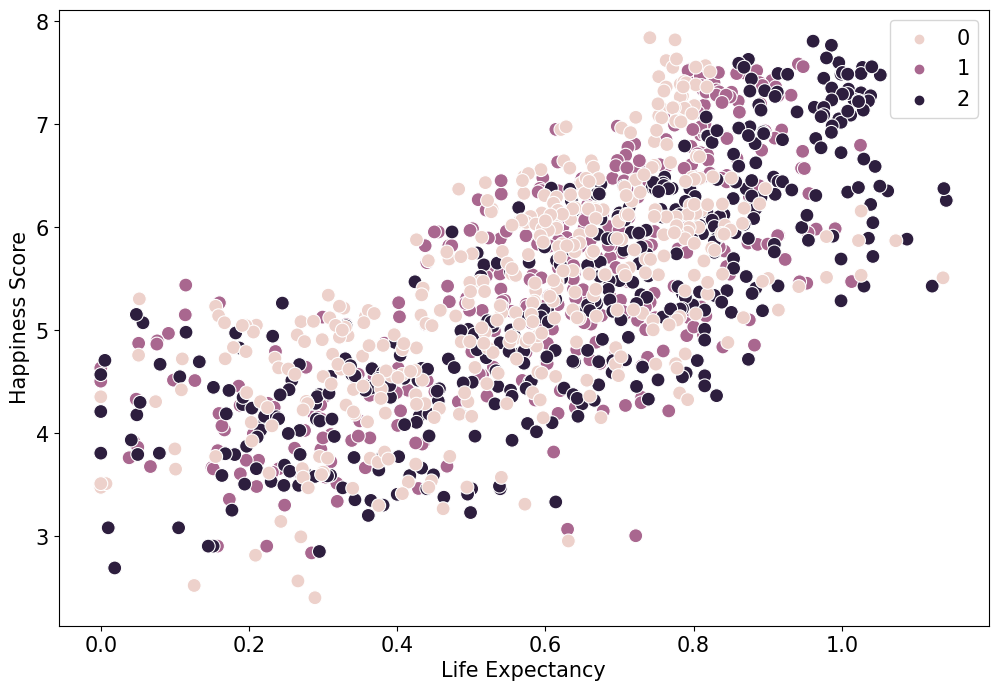

In [51]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life_Expectancy'], y=df['Happiness_Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Happiness Score') 
plt.show()

### Plot clusters for the "Social support" and "Happiness Score" variables.

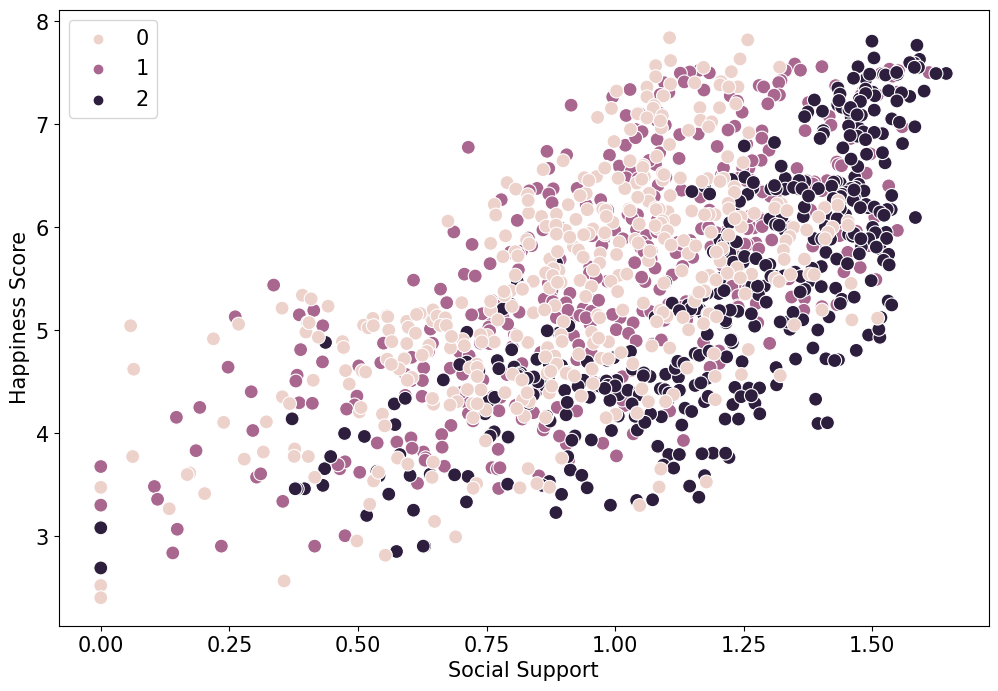

In [52]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Social_support'], y=df['Happiness_Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Social Support') 
plt.ylabel('Happiness Score') 
plt.show()

### Plot the clusters for the "Corruption" and "Happiness Score" variables.

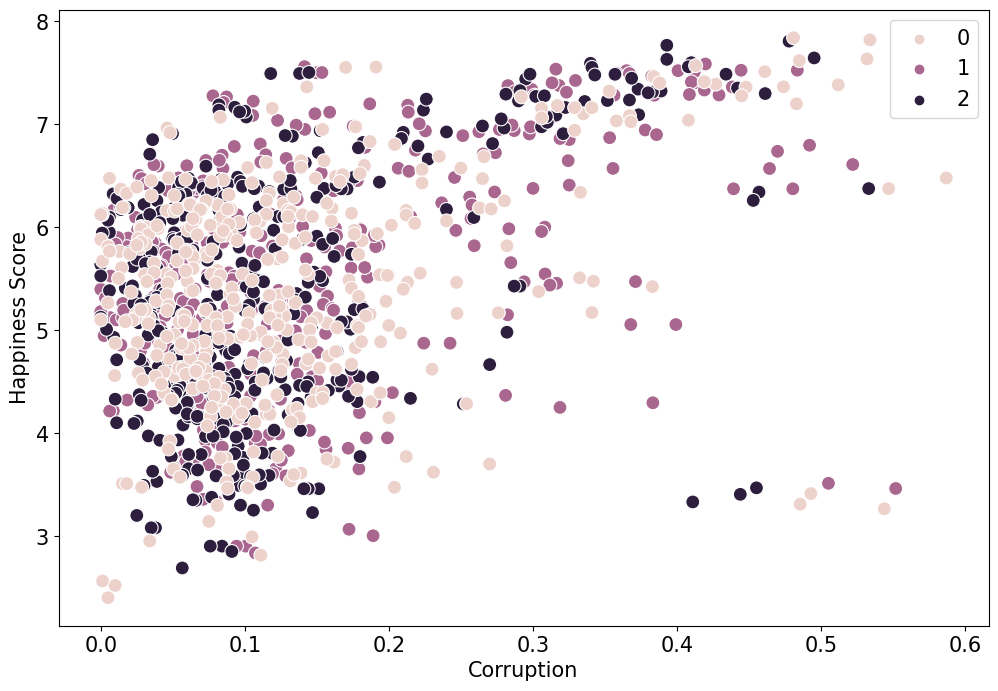

In [53]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Corruption'], y=df['Happiness_Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Corruption') 
plt.ylabel('Happiness Score') 
plt.show()

### Plot the clusters for the "Social support" and "GDP per Capita" variables.

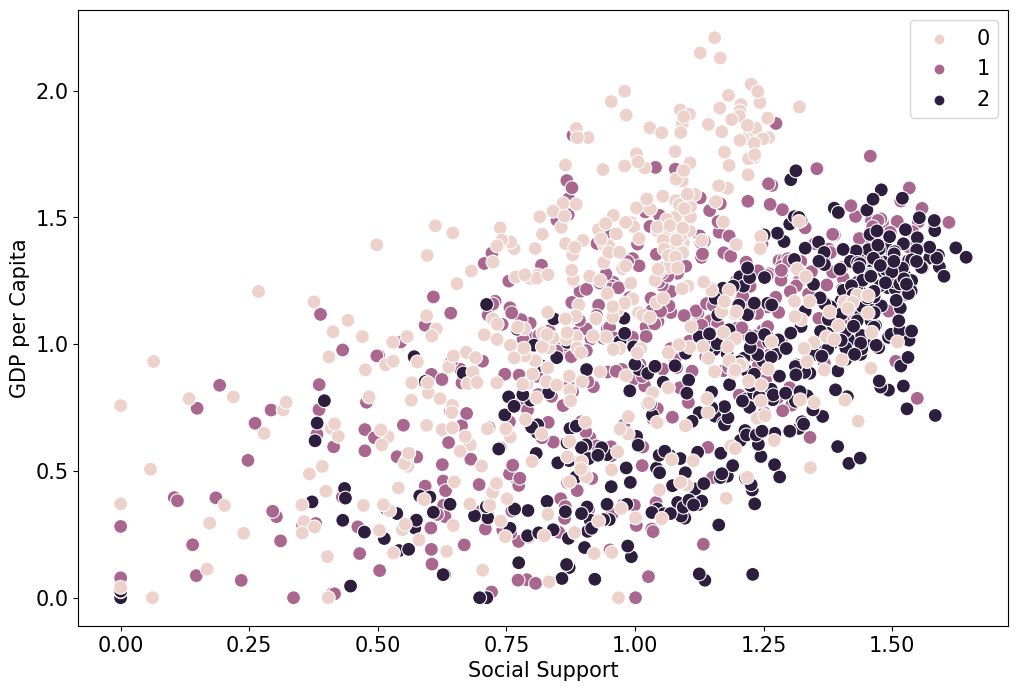

In [54]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Social_support'], y=df['GDP_per_Capita'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Social Support') 
plt.ylabel('GDP per Capita') 
plt.show()

# Plot clusters for the "Life Expectancy" and "GDP per Capita" variables.

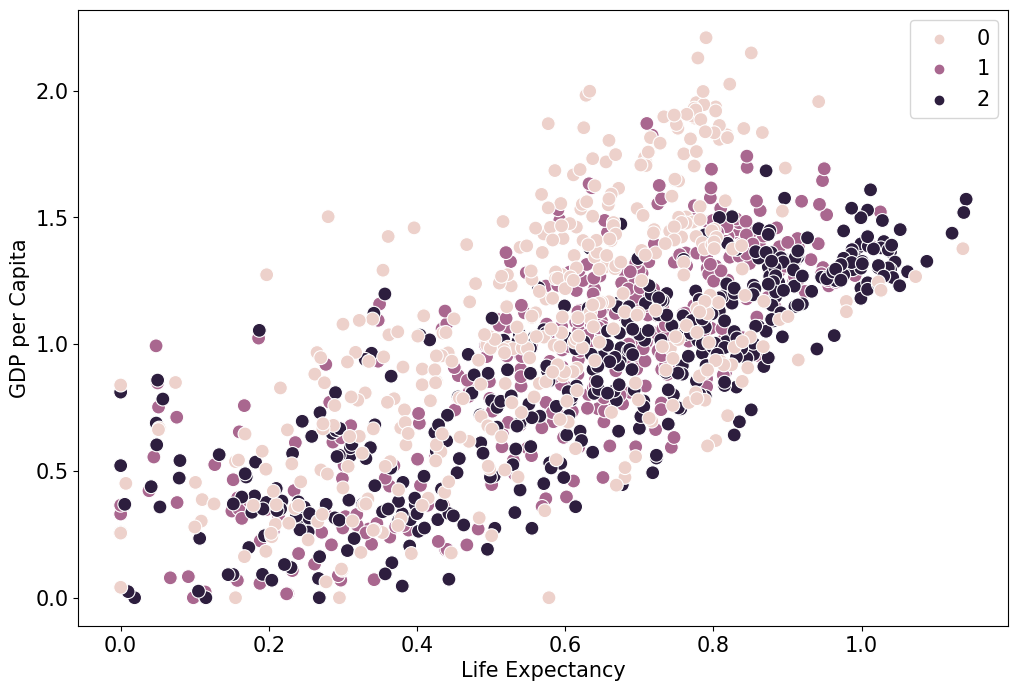

In [55]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life_Expectancy'], y=df['GDP_per_Capita'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('GDP per Capita') 
plt.show()

# Plot clusters for the "Life Expectancy" and "Social Support" variables.

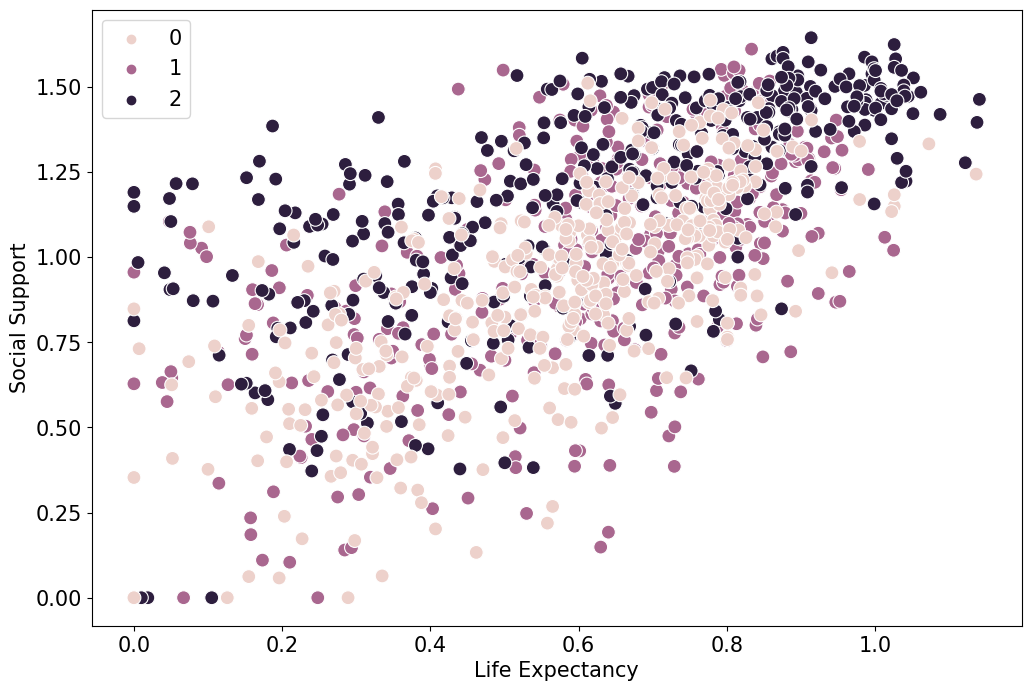

In [56]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life_Expectancy'], y=df['Social_support'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Social Support') 
plt.show()

### Plot clusters for the "Year" and "Happiness Score" variables.

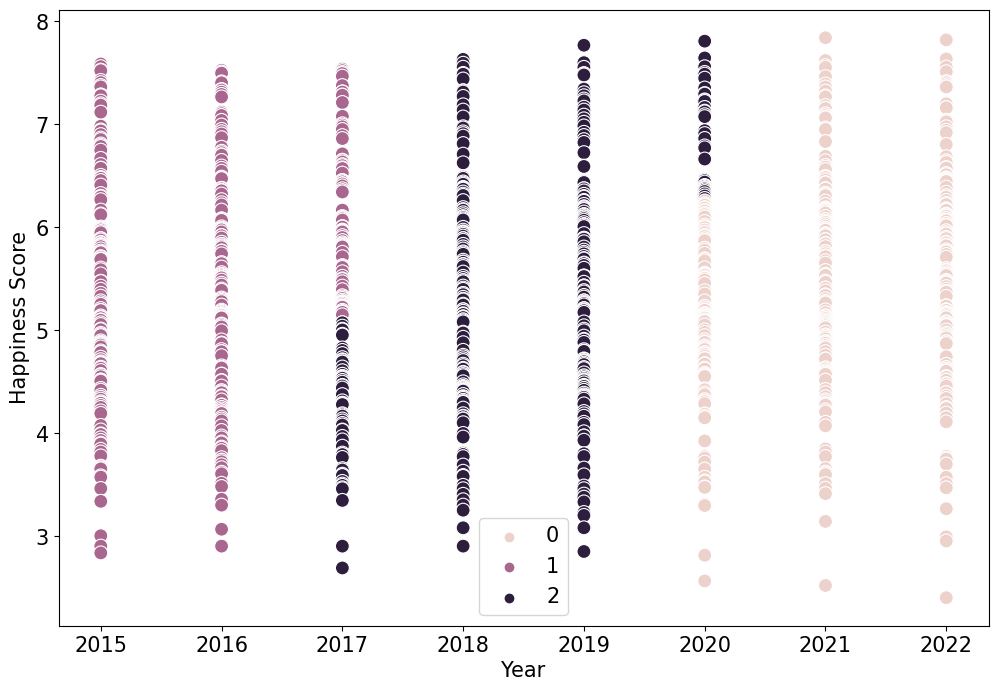

In [57]:
fig1 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Happiness_Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Happiness Score') 
plt.show()

fig1.savefig("output.jpg")

### Plot clusters for the "Year" and "Social support" variables.

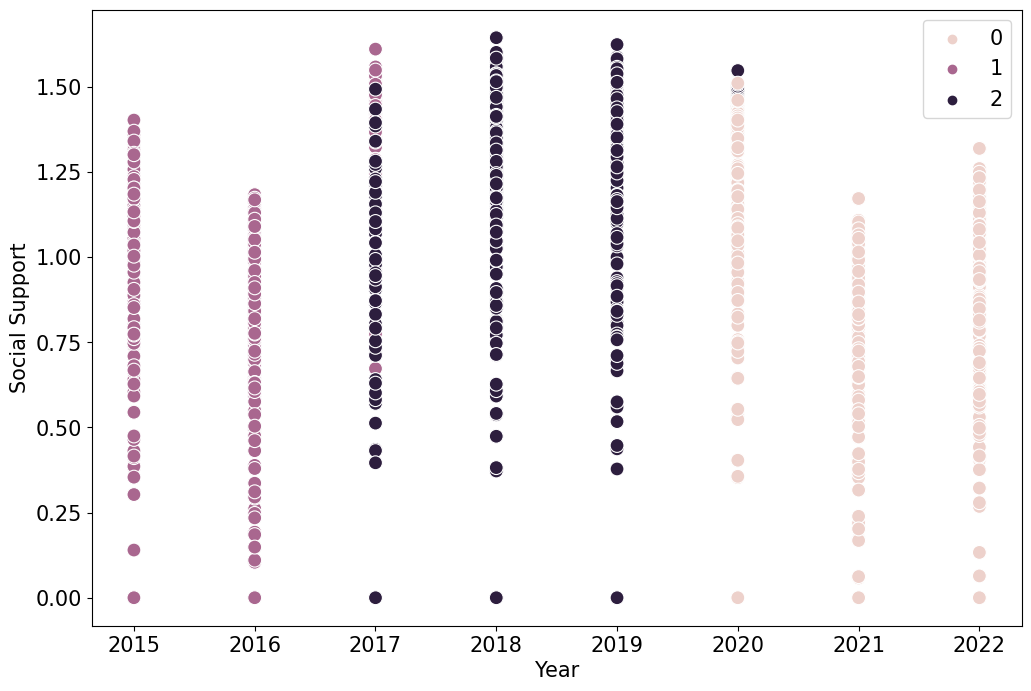

In [58]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Social_support'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Social Support') 
plt.show()

### Plot clusters for the "Year" and "Life Expectancy" variables.

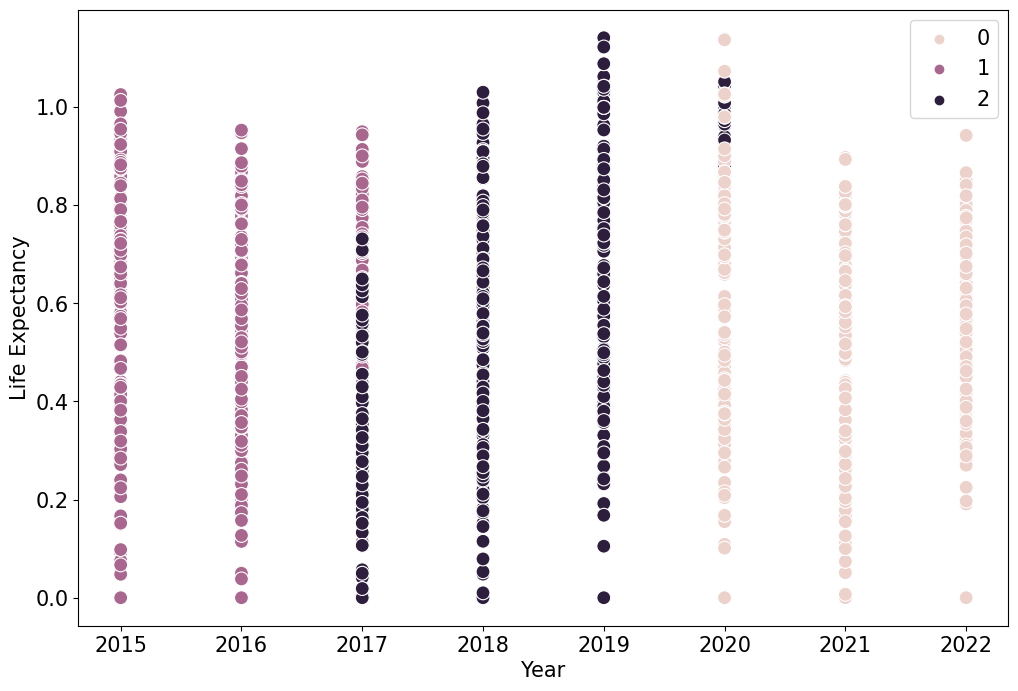

In [59]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Life_Expectancy'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
plt.show()

### Plot clusters for the "Year" and "Happiness rank" variables.

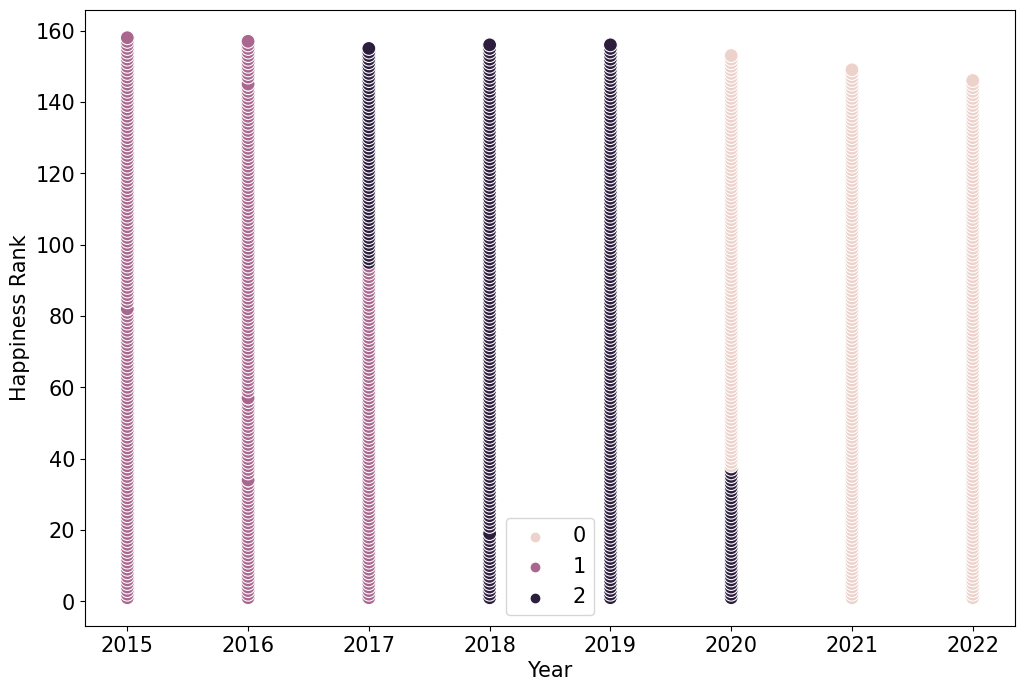

In [60]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Happiness_Rank'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Happiness Rank') 
plt.show()

In [61]:
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [62]:
df.groupby('cluster').agg({'Year':['mean', 'median'],
                           'Happiness_Rank':['mean', 'median'],
                           'Happiness_Score':['mean', 'median'],
                           'GDP_per_Capita':['mean', 'median'], 
                         'Social_support':['mean', 'median'], 
                         'Life_Expectancy':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                          'Generosity':['mean', 'median'],
                          'Corruption':['mean', 'median']}).round(2)

Year         Happiness_Rank        Happiness_Score         \
            mean  median           mean median            mean median   
cluster                                                                 
black    2018.41  2018.0          80.20   85.0            5.35   5.26   
pink     2021.07  2021.0          80.25   81.0            5.40   5.40   
purple   2015.84  2016.0          71.94   69.0            5.54   5.55   

        GDP_per_Capita        Social_support        Life_Expectancy         \
                  mean median           mean median            mean median   
cluster                                                                      
black             0.88   0.95           1.19   1.25            0.64   0.68   
pink              1.07   1.04           0.91   0.96            0.57   0.60   
purple            0.98   1.05           0.99   1.03            0.62   0.65   

        Freedom        Generosity        Corruption         
           mean median       mean median       mean median  
cluster                                                     
black      0.42   0.45       0.20   0.18       0.12   0.09  
pink       0.49   0.50       0.17   0.15       0.13   0.10  
purple     0.41   0.43       0.24   0.22       0.14   0.11

A few insights regarding the above scatterplors and descriptive statistics:


1. There seems to be an important effect of Year on the different variables. Cluster change is clear to see. Since 2020 pink is the main cluster. Could it be that variables meassuring happiness, changed during and after COVID? and what about early years (2015-2016)?


2. We see a clear linear relationship when plotting GPD per capita, life expectancy and social support variables with the happiness score. For GDP, pink and dark purple clusters presented the maximum Happiness scores, and the pink cluster showed the highest GDP values. After 1.5 in the GPD, there is not a higher increase in the happiness score. Both clusters, pink and purple, had the same maximum happiness score. The same happens for life expectancy after 0.8 and social support after 1.25. That means there is a point where the happiness score won't increase with the rise of the values in these variables. In other words, maybe an individual factor cannot be the only one for making someone happy. Would the combination of them do it?


3. In the case of the corruption vs happiness score, there seems to be no linear relationship between the variables. Also, the clusters are similar. In addittion, it appears that corruption does not have a negative effect on happiness.


4. When comparing social support and Life expectancy vs GPD, the pink cluster obtained the highest values for GPD; however, lower values for social support and life expectancy. Does that mean that more money (after 1.5) decreases the social part of a person? Does higher money reduce the lifespan (after 0.8)?


